# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# Goals

There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.<br>
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing Libraries & Data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import statsmodels
import statsmodels.api as sm 
import sklearn
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [5]:
leads = pd.read_csv('C:/Games/Anna/UpGrad/LeadScoringAssignment/leads.csv')

In [6]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
#There are a total of 37 columns and by the default settings most of those are not shown so we will change it 
pd.set_option('max_columns',None)

In [8]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
leads.shape 

(9240, 37)

In [11]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Cleaning Data 

In [12]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

We need to get rid of all those missing values 

In [13]:
null = leads.isnull().sum()

In [14]:
null[null>0]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

In [15]:
## Lets remove all those with more than 30% null values 
(30*9240)/100

2772.0

In [16]:
drop_1 = null[null>2772].index

In [17]:
leads = leads.drop(drop_1,axis = 1)

In [18]:
null1 = leads.isnull().sum()

In [19]:
null[null>0]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

In [20]:
leads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

The select here looks like they have not filled it that is those are null values <br>
Which makes these more than 30% null we will remove these <br>
Lets see if there are more cases like these 

In [21]:
leads["Lead Profile"].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

Same case here also we will remove this also along city

In [22]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Here most of the replies are Better Career Prospects and the other 2 are very less in comaprison so we will remove these 

In [23]:
leads["How did you hear about X Education"].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Again Select is repeated this means we can remove this also 

In [24]:
leads["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Again we will remove this 

In [25]:
leads["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Kuwait                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Italy                      2
Belgium                    2
Ghana                      2
Bangladesh                 2
Philippines                2
Netherlands                2
Uganda                     2
Kenya                      1
Switzerland                1
Denmark                    1
Malaysia                   1
Tanzania                   1
Liberia                    1
Vietnam       

Here from this it is clear that Almost all the data is from India and no use for country anymore we will drop this 

In [26]:
leads["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64

For this we will remove all those missing rows as they small in number and won't disrupt the data much

In [27]:
leads = leads[~pd.isnull(leads["Page Views Per Visit"])]

In [28]:
leads = leads.drop(["City","Country","Specialization","What matters most to you in choosing a course","Lead Profile","How did you hear about X Education"],axis = 1)

We will remove the rows of lead source also as they are small

In [29]:
leads = leads[~pd.isnull(leads["Lead Source"])]

In [30]:
leads.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
What is your current occupation             2683
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply 

In [31]:
leads["What is your current occupation"].value_counts()

Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
leads["What is your current occupation"].describe()

count           6391
unique             6
top       Unemployed
freq            5476
Name: What is your current occupation, dtype: object

Here missing value can be interpreted as unemployed also Unemployed is the mode here we will fill those with Unemployed

In [33]:
leads["What is your current occupation"].fillna("Unemployed",inplace = True)

In [34]:
leads["What is your current occupation"].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [35]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [36]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 25 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 

In [37]:
leads['Prospect ID'].value_counts()

95e3588d-c88f-4d4f-a2c4-5c3acf555b65    1
5f21a5af-814c-4dc9-b28e-e42af3e34507    1
e832e23e-839c-4b1c-a2be-d767bfa79d63    1
2c5ee55e-c6e9-4495-8bef-27ff1bad38e8    1
23873317-72ed-4b5d-9d3e-d0231ef9b341    1
b1e57633-92fc-4113-85b4-8cd3c2dee655    1
3bc68d79-fd65-4d30-8a9a-4af921864cc3    1
7497ef96-c9f6-4bb6-b236-139e817ffeda    1
a9b219c8-a9c2-4d13-9a4d-46cfe4f70eeb    1
a805f719-fa90-4887-bf5e-0ee5c975fdc2    1
5898ef9b-8494-4ca2-a6c5-6e97fd0a5940    1
0918c483-3947-4cc0-99e6-56d29483f56b    1
8efac8a3-f7d2-46d5-a17f-b0f22d6853c5    1
52f8eaf0-0370-46f0-a0a3-352bbaee5c40    1
8b44b874-ca44-4cda-8044-fe3afa6cdc98    1
a5254b6e-8953-42ce-8904-dc5e38a1732f    1
123b54da-afb9-4b71-9155-901b20c72351    1
48ad1239-45ac-444c-b6b0-80119aeef5d5    1
245605b5-bb2e-4b64-8104-4248c187db77    1
ba275a2b-4349-46f6-a756-8deae9104848    1
a69d20bf-1341-4d31-936a-5cbf44a09b05    1
1fa14d53-0c56-4713-853e-4d688253b6ec    1
2611e818-addd-489b-a41e-0841b501fba8    1
2017c47d-9675-4cd8-84f3-479c992ab4

In [38]:
leads['Lead Number'].value_counts()

608255    1
656682    1
634167    1
625971    1
646449    1
588514    1
648494    1
603436    1
592824    1
613689    1
652580    1
583105    1
623906    1
646433    1
599326    1
605469    1
611640    1
656698    1
582406    1
600072    1
588939    1
626003    1
628048    1
585039    1
648526    1
625995    1
648518    1
593211    1
636228    1
582611    1
         ..
654018    1
631489    1
600768    1
598556    1
619195    1
637666    1
621242    1
588008    1
645814    1
635571    1
631473    1
645806    1
654026    1
586443    1
613070    1
649936    1
615121    1
637650    1
598730    1
590549    1
596694    1
594647    1
584408    1
631513    1
639709    1
582137    1
643807    1
600800    1
598753    1
655360    1
Name: Lead Number, Length: 9074, dtype: int64

In [39]:
leads = leads.drop('Prospect ID',axis = 1)

In [40]:
leads = leads.drop('Lead Number',axis = 1)

In [41]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
What is your current occupation             9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 non-null object
X Education Forums                          9074

In [42]:
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
90%,1.000000,7.000000,1373.000000,5.000000
95%,1.000000,10.000000,1557.000000,6.000000
99%,1.000000,17.000000,1839.000000,9.000000


There are outliers in Total Visits and Page views per visit

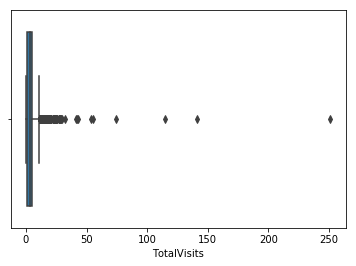

In [43]:
sns.boxplot(leads.TotalVisits)
plt.show()

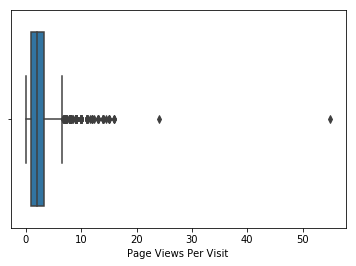

In [44]:
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

Here we have outliers 

We need to act accordingly as we go further into EDA

Till now we have Cleaned the data 

Droped a few unwanted columns 

Got rid of Null values present in the data 

In [45]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


## EDA

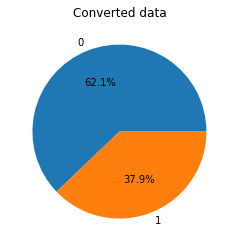

In [46]:
label = ['0','1']
plt.pie(leads.Converted.value_counts(),labels = label,autopct='%1.1f%%')
plt.title('Converted data')
plt.show()

In [47]:
y = ['Search' , 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement' , 'Through Recommendations']

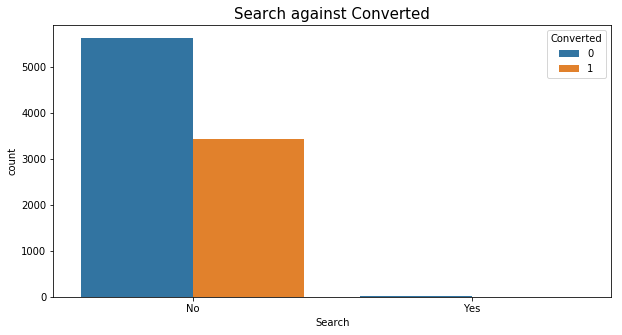

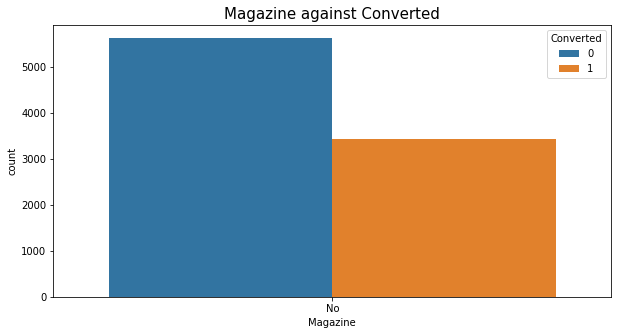

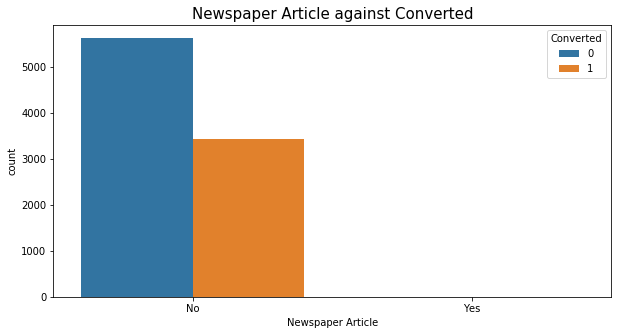

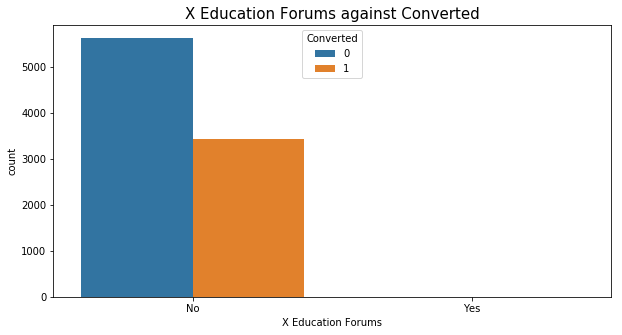

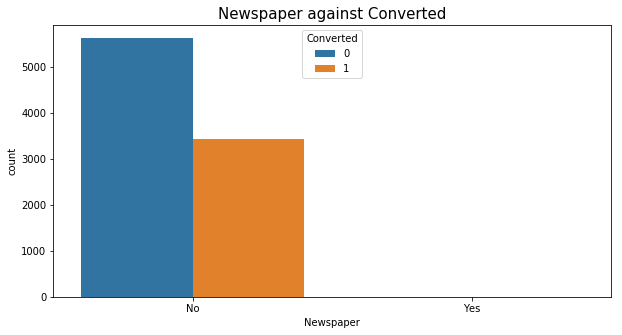

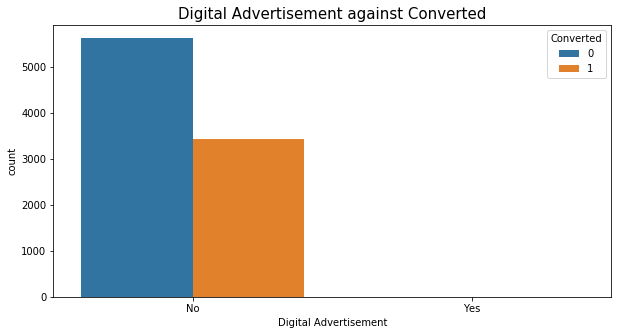

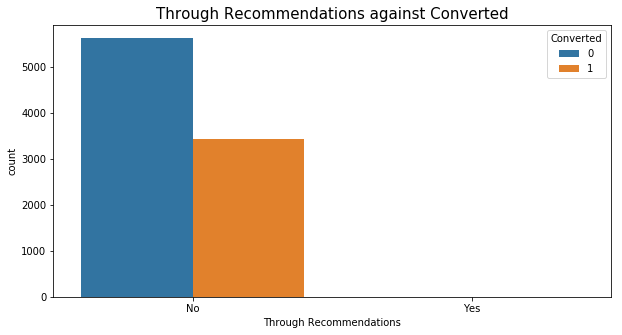

In [48]:
for i in y:
    plt.figure(figsize=[10,5])
    sns.countplot(x=i,hue='Converted',data=leads)
    plt.title(i+" against Converted", fontsize=15)
    plt.show()

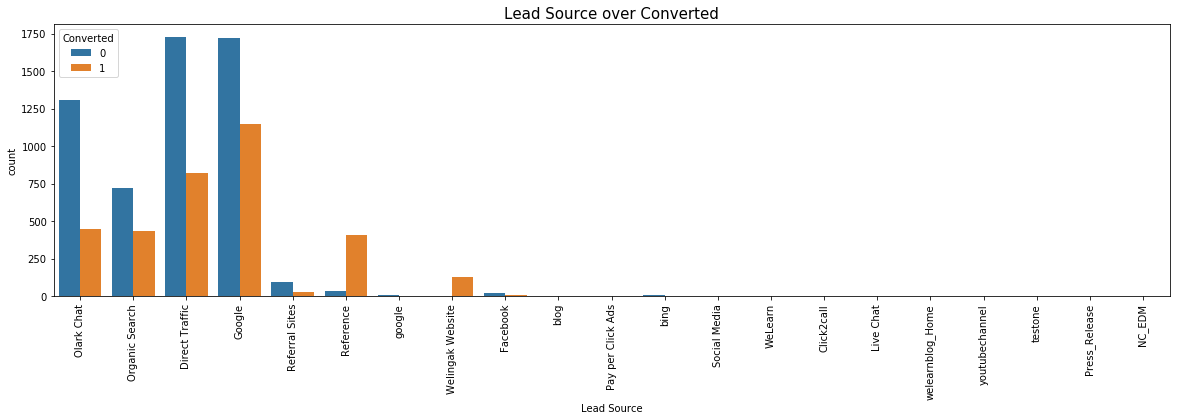

In [49]:
plt.figure(figsize=[20,5])
sns.countplot(x='Lead Source',hue='Converted',data=leads)
plt.title("Lead Source over Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

In [50]:
z = ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

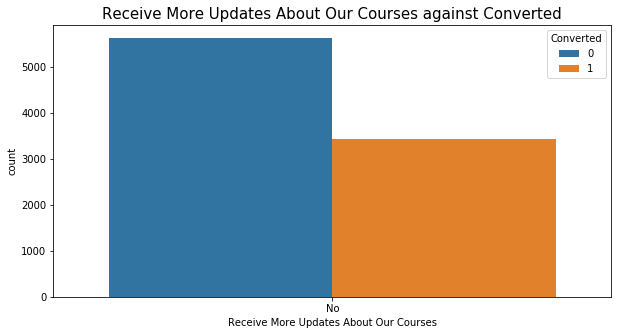

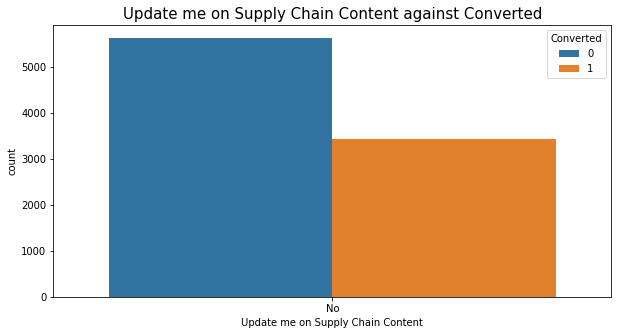

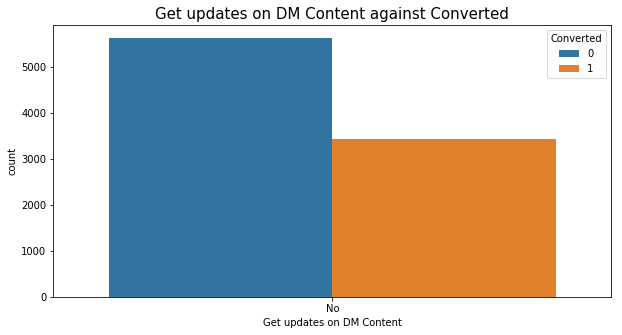

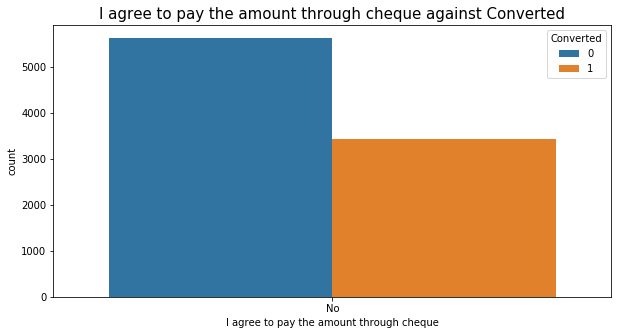

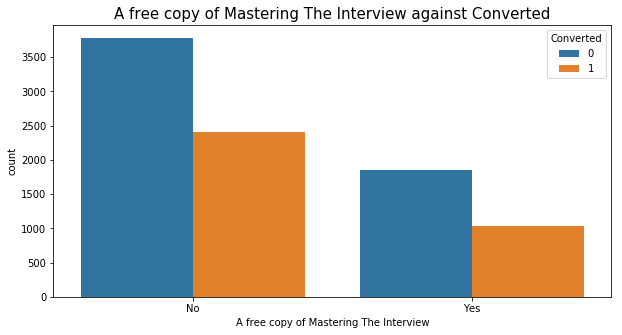

In [51]:
for i in z:
    plt.figure(figsize=[10,5])
    sns.countplot(x=i,hue='Converted',data=leads)
    plt.title(i+" against Converted", fontsize=15)
    plt.show()

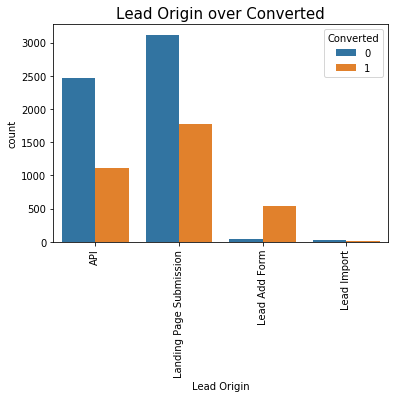

In [52]:
sns.countplot(x='Lead Origin',hue='Converted',data=leads)
plt.title("Lead Origin over Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

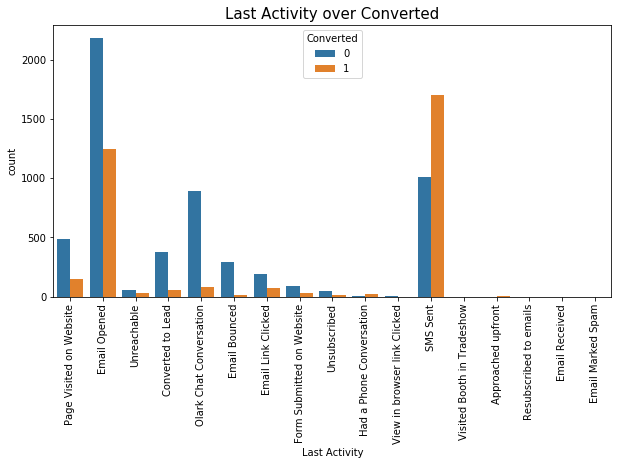

In [53]:
plt.figure(figsize=[10,5])
sns.countplot(x='Last Activity',hue='Converted',data=leads)
plt.title("Last Activity over Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

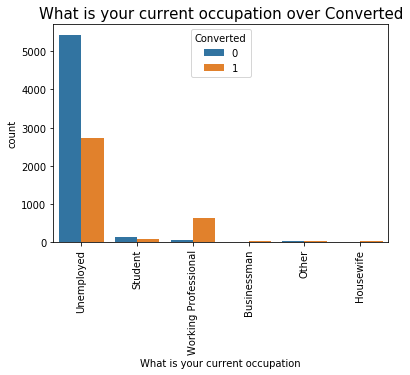

In [54]:
sns.countplot(x='What is your current occupation',hue='Converted',data=leads)
plt.title("What is your current occupation over Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

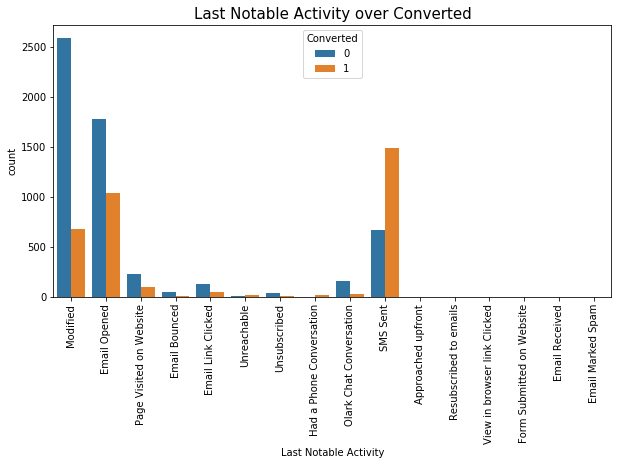

In [55]:
plt.figure(figsize=[10,5])
sns.countplot(x='Last Notable Activity',hue='Converted',data=leads)
plt.title("Last Notable Activity over Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

In [56]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


### Categorical over Continous 

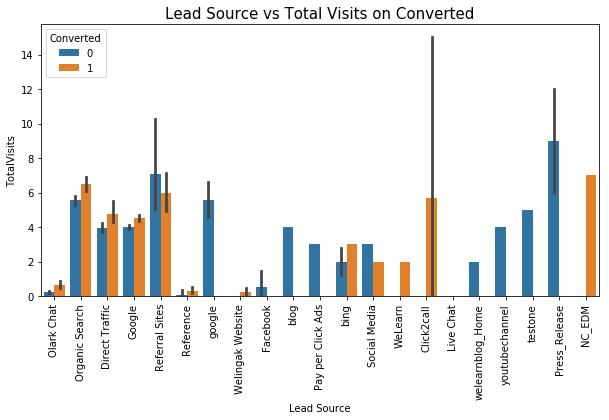

In [57]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Lead Source", y="TotalVisits",hue="Converted")
plt.title("Lead Source vs Total Visits on Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

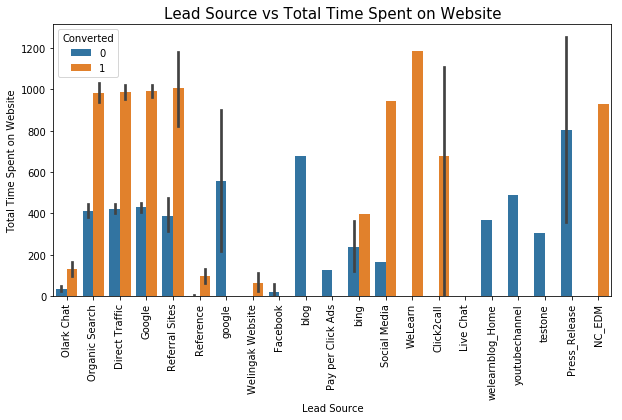

In [58]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Lead Source", y="Total Time Spent on Website",hue="Converted")
plt.title("Lead Source vs Total Time Spent on Website", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

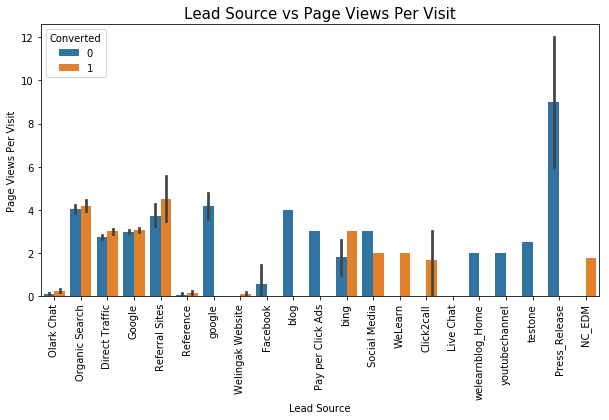

In [59]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Lead Source", y="Page Views Per Visit",hue="Converted")
plt.title("Lead Source vs Page Views Per Visit", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

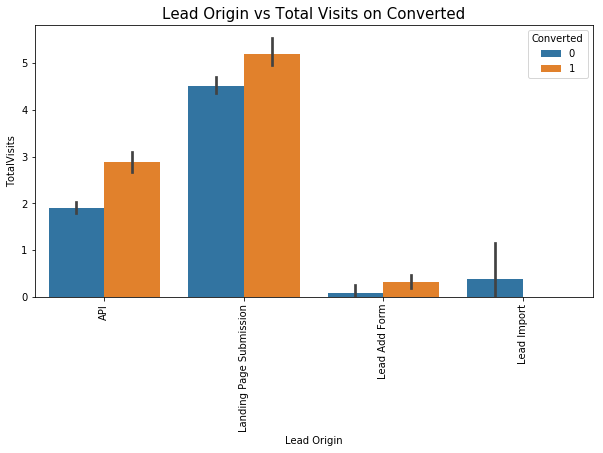

In [60]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Lead Origin", y="TotalVisits",hue="Converted")
plt.title("Lead Origin vs Total Visits on Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

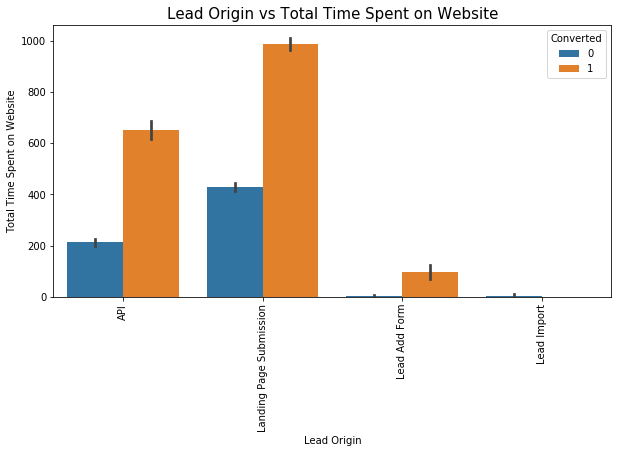

In [61]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Lead Origin", y="Total Time Spent on Website",hue="Converted")
plt.title("Lead Origin vs Total Time Spent on Website", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

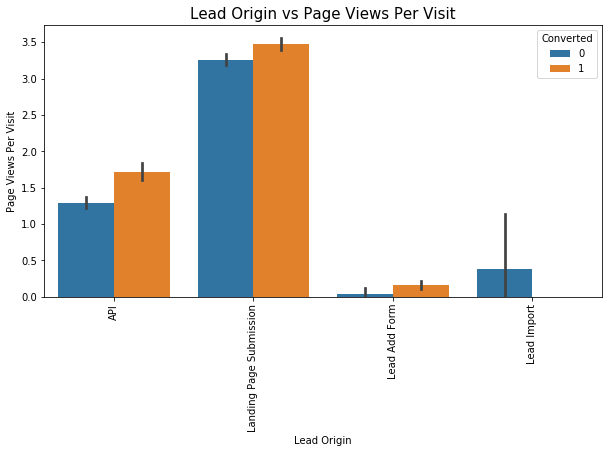

In [62]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Lead Origin", y="Page Views Per Visit",hue="Converted")
plt.title("Lead Origin vs Page Views Per Visit", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

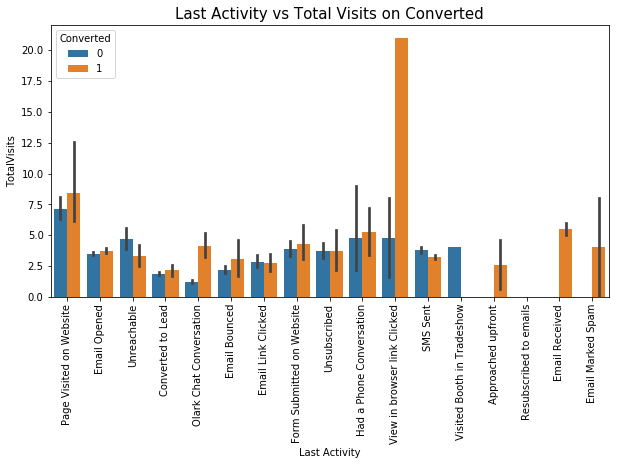

In [63]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Last Activity", y="TotalVisits",hue="Converted")
plt.title("Last Activity vs Total Visits on Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

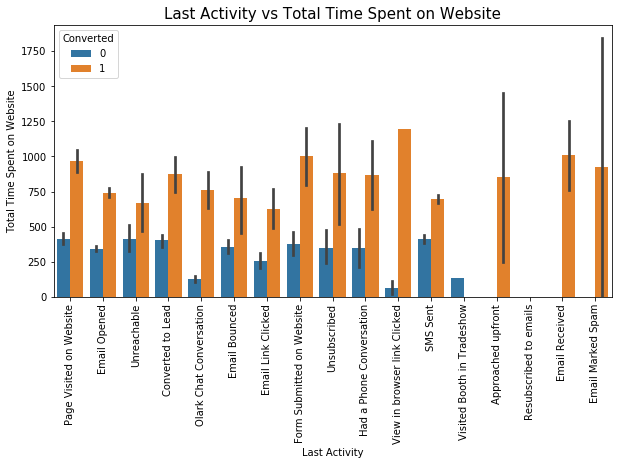

In [64]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Last Activity", y="Total Time Spent on Website",hue="Converted")
plt.title("Last Activity vs Total Time Spent on Website", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

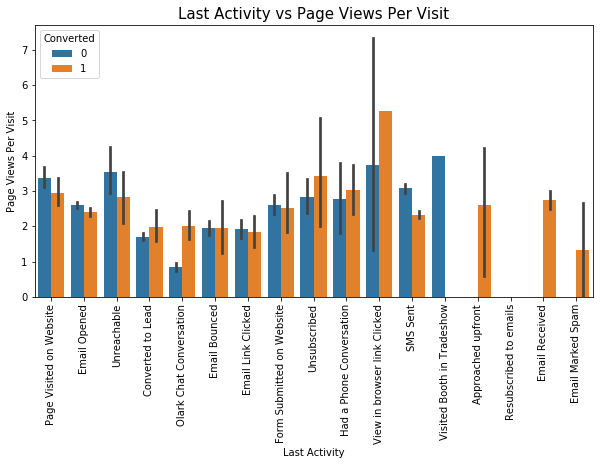

In [65]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Last Activity", y="Page Views Per Visit",hue="Converted")
plt.title("Last Activity vs Page Views Per Visit", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

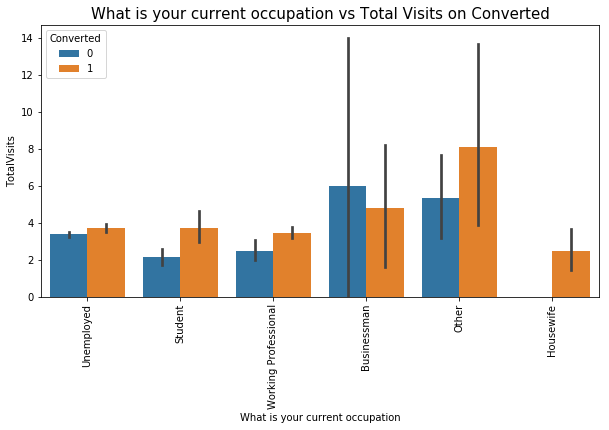

In [66]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="What is your current occupation", y="TotalVisits",hue="Converted")
plt.title("What is your current occupation vs Total Visits on Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

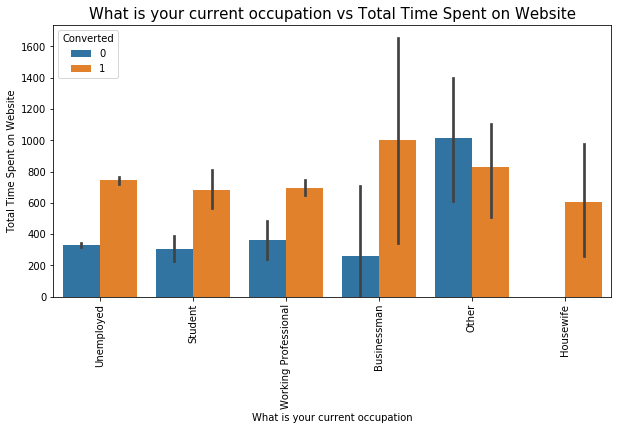

In [67]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="What is your current occupation", y="Total Time Spent on Website",hue="Converted")
plt.title("What is your current occupation vs Total Time Spent on Website", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

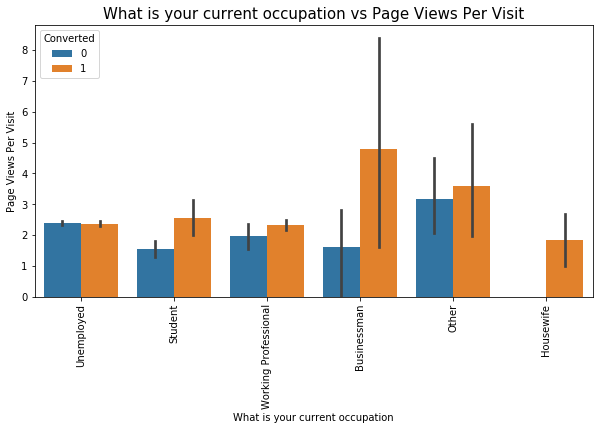

In [68]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="What is your current occupation", y="Page Views Per Visit",hue="Converted")
plt.title("What is your current occupation vs Page Views Per Visit", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

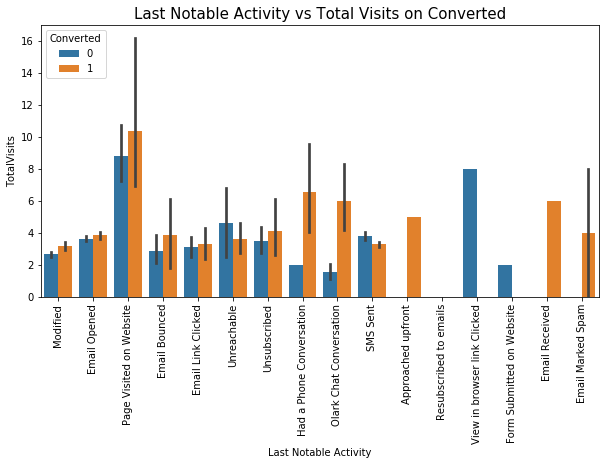

In [69]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Last Notable Activity", y="TotalVisits",hue="Converted")
plt.title("Last Notable Activity vs Total Visits on Converted", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

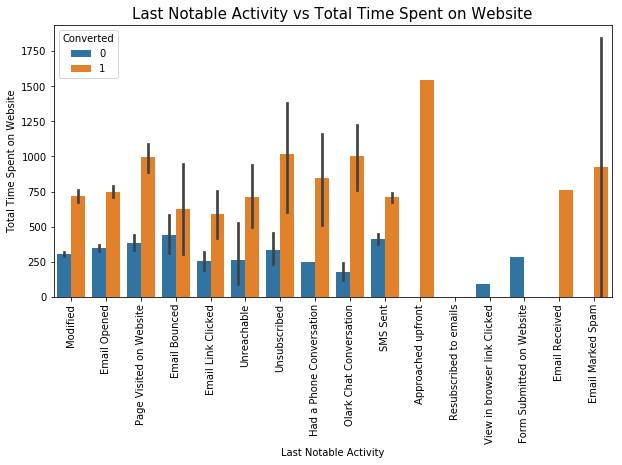

In [70]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Last Notable Activity", y="Total Time Spent on Website",hue="Converted")
plt.title("Last Notable Activity vs Total Time Spent on Website", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

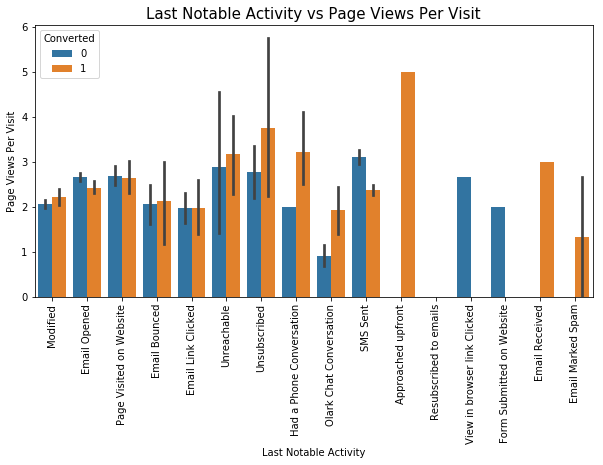

In [71]:
plt.figure(figsize=[10,5])
sns.barplot(data=leads, x="Last Notable Activity", y="Page Views Per Visit",hue="Converted")
plt.title("Last Notable Activity vs Page Views Per Visit", fontsize=15)
plt.xticks(rotation = 90)
plt.show()

### Contiouns Variables

In [72]:
leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


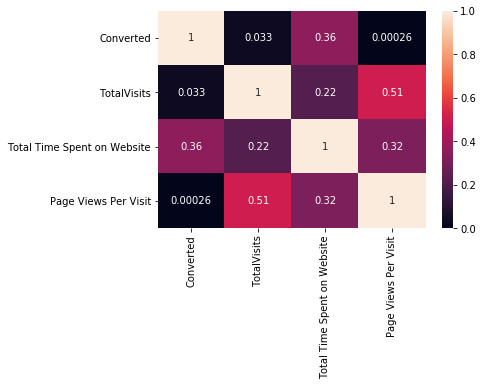

In [73]:
sns.heatmap(leads.corr(),annot=True)
plt.show()

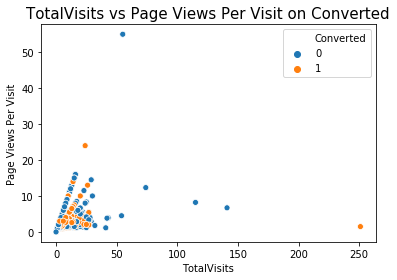

In [74]:
sns.scatterplot(leads.TotalVisits,leads['Page Views Per Visit'],hue=leads.Converted)
plt.title("TotalVisits vs Page Views Per Visit on Converted", fontsize=15)
plt.show()

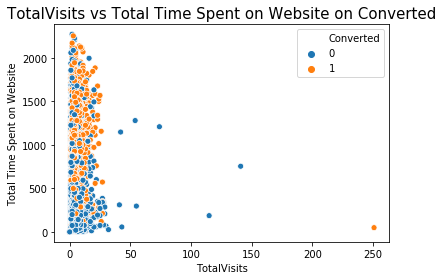

In [75]:
sns.scatterplot(leads.TotalVisits,leads['Total Time Spent on Website'],hue=leads.Converted)
plt.title("TotalVisits vs Total Time Spent on Website on Converted", fontsize=15)
plt.show()

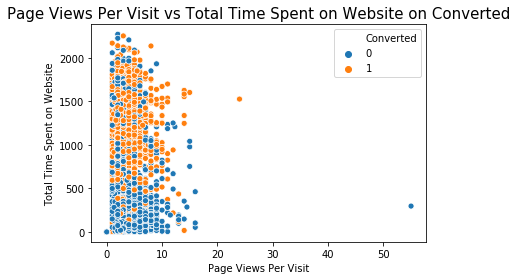

In [76]:
sns.scatterplot(leads['Page Views Per Visit'],leads['Total Time Spent on Website'],hue=leads.Converted)
plt.title("Page Views Per Visit vs Total Time Spent on Website on Converted", fontsize=15)
plt.show()

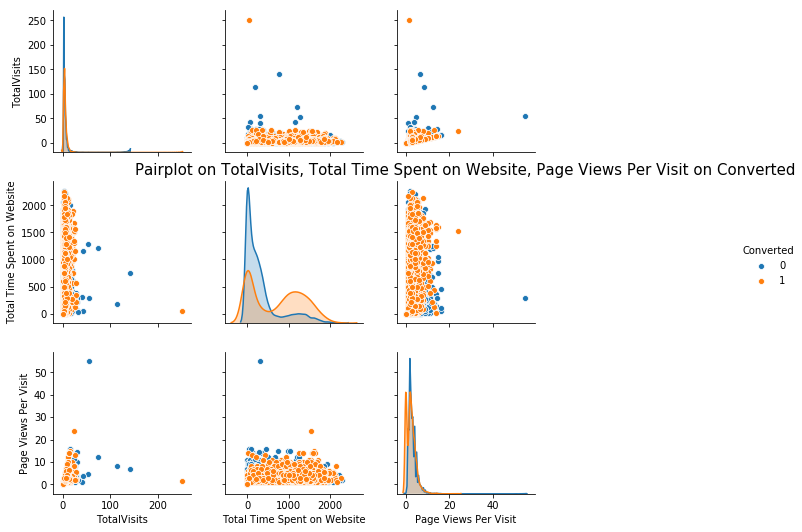

In [77]:
sns.pairplot(data=leads,vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"],hue="Converted")
plt.title("Pairplot on TotalVisits, Total Time Spent on Website, Page Views Per Visit on Converted", fontsize=15)
plt.show()

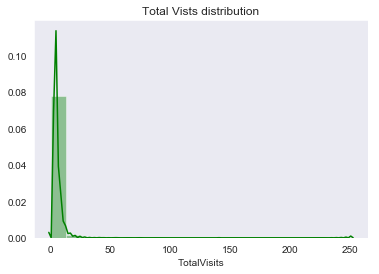

In [78]:
sns.set_style("dark")
sns.distplot(leads.TotalVisits, bins=20, color="g")
plt.title("Total Vists distribution", fontsize=12)
plt.show()

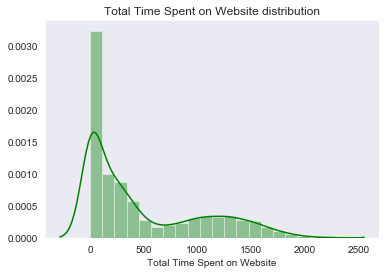

In [79]:
sns.set_style("dark")
sns.distplot(leads['Total Time Spent on Website'], bins=20, color="g")
plt.title("Total Time Spent on Website distribution", fontsize=12)
plt.show()

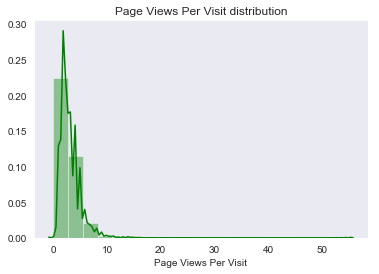

In [80]:
sns.set_style("dark")
sns.distplot(leads['Page Views Per Visit'], bins=20, color="g")
plt.title("Page Views Per Visit distribution", fontsize=12)
plt.show()

Dummies creation

In [81]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


Here we already have these some in form of yes or no so it is better we change them to 0,1 <br> Instead of creating dummies for them and then deleting the original column again

In [82]:
leads['Do Not Email'] = leads['Do Not Email'].replace(['No','Yes'],[0,1])
leads['Do Not Call'] = leads['Do Not Call'].replace(['No','Yes'],[0,1])
leads['Search'] = leads['Search'].replace(['No','Yes'],[0,1])
leads['Magazine'] = leads['Magazine'].replace(['No','Yes'],[0,1])
leads['Newspaper Article'] = leads['Newspaper Article'].replace(['No','Yes'],[0,1])
leads['Newspaper'] = leads['Newspaper'].replace(['No','Yes'],[0,1])
leads['X Education Forums'] = leads['X Education Forums'].replace(['No','Yes'],[0,1])
leads['Digital Advertisement'] = leads['Digital Advertisement'].replace(['No','Yes'],[0,1])
leads['Through Recommendations'] = leads['Through Recommendations'].replace(['No','Yes'],[0,1])
leads['Receive More Updates About Our Courses'] = leads['Receive More Updates About Our Courses'].replace(['No','Yes'],[0,1])
leads['Update me on Supply Chain Content'] = leads['Update me on Supply Chain Content'].replace(['No','Yes'],[0,1])
leads['Get updates on DM Content'] = leads['Get updates on DM Content'].replace(['No','Yes'],[0,1])
leads['I agree to pay the amount through cheque'] = leads['I agree to pay the amount through cheque'].replace(['No','Yes'],[0,1])
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].replace(['No','Yes'],[0,1])


In [83]:
var = pd.get_dummies(leads[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']])

In [84]:
leads = pd.concat([leads,var], axis = 1)

In [85]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Dropping the original columns and forst in every category as they are of no use in further process

In [86]:
leads = leads.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity','Lead Origin_API','Lead Source_Click2call','Last Activity_Approached upfront','What is your current occupation_Businessman','Last Notable Activity_Approached upfront'],axis = 1)

In [87]:
leads.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## MODEL BUILDING

### Splitting the data 

In [88]:
X = leads.drop(['Converted'], axis = 1)

In [89]:
y = leads['Converted']

In [90]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [91]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

Creating Train and split data 

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [93]:
X_train.shape

(6351, 76)

In [94]:
y_train.shape

(6351,)

In [95]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2.0,397,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.0,190,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,2.0,1380,2.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,5.0,1584,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Scaling the numerical values to common range for further analysis

In [96]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

C:\Users\chjyn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.007968,0.178347,0.083333,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.007968,0.085355,0.083333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.007968,0.619946,0.083333,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.019920,0.711590,0.104167,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:
leads.corr()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.004346,-0.140786,0.035715,-0.046192,0.036403,-0.011505,-0.004346,-0.003073,-0.003073,-0.006147,-0.008132,0.058023,0.099661,-0.031468,-0.016857,0.112262,-0.017137,-0.071484,-0.004346,-0.003073,-0.051070,0.035510,-0.003073,0.050729,-0.035958,-0.010042,-0.004346,-0.003073,0.002835,-0.007529,-0.003073,0.010547,-0.003073,-0.003073,0.035869,-0.063193,0.620041,-0.043705,0.050729,-0.220691,-0.004346,-0.018751,-0.007586,-0.055115,0.083819,-0.003073,-0.019915,0.007831,0.261142,-0.007529,-0.003073,-0.009222,-0.001847,0.007534,0.039641,-0.047325,0.278748,-0.037815,0.050729,-0.189628,-0.003073,-0.003073,-0.011505,0.122812,-0.012911,0.050922,-0.003073,-0.029608,-0.010516,0.241202,-0.003073
Do Not Call,-0.004346,1.000000,0.019024,0.003190,0.007029,-0.005979,-0.000584,-0.000220,-0.000156,-0.000156,-0.000312,-0.000413,-0.010145,-0.016034,0.026442,-0.000855,-0.009265,-0.000869,0.005874,-0.000220,-0.000156,-0.007266,-0.005668,-0.000156,-0.000220,0.031087,-0.001755,-0.000220,-0.000156,-0.001783,-0.000382,-0.000156,-0.000349,-0.000156,-0.000156,-0.000156,-0.003304,-0.002802,-0.002585,-0.000220,0.003729,-0.000220,-0.001690,-0.000780,0.018862,-0.004090,-0.000156,-0.009704,-0.001486,-0.001201,-0.000382,-0.000156,-0.000468,-0.000604,-0.002263,0.004972,-0.004216,-0.001211,-0.002070,-0.000220,-0.009978,-0.000156,-0.000156,-0.000584,0.019795,-0.002130,-0.002830,-0.000156,-0.008279,-0.000883,-0.001048,-0.000156
Converted,-0.140786,0.019024,1.000000,0.032855,0.359261,0.000260,-0.001735,0.003718,-0.008194,-0.008194,-0.005566,0.019233,-0.030860,-0.037481,0.300775,-0.009328,-0.073186,-0.010651,0.029960,0.019024,0.013451,-0.124085,-0.000581,-0.008194,-0.011588,0.255480,-0.031812,0.003718,0.013451,0.150027,-0.011237,-0.008194,-0.018326,-0.008194,-0.008194,-0.008194,-0.115775,-0.127327,-0.037746,0.019024,-0.023051,0.019024,-0.032183,0.0456

Let's see the correlation of leads

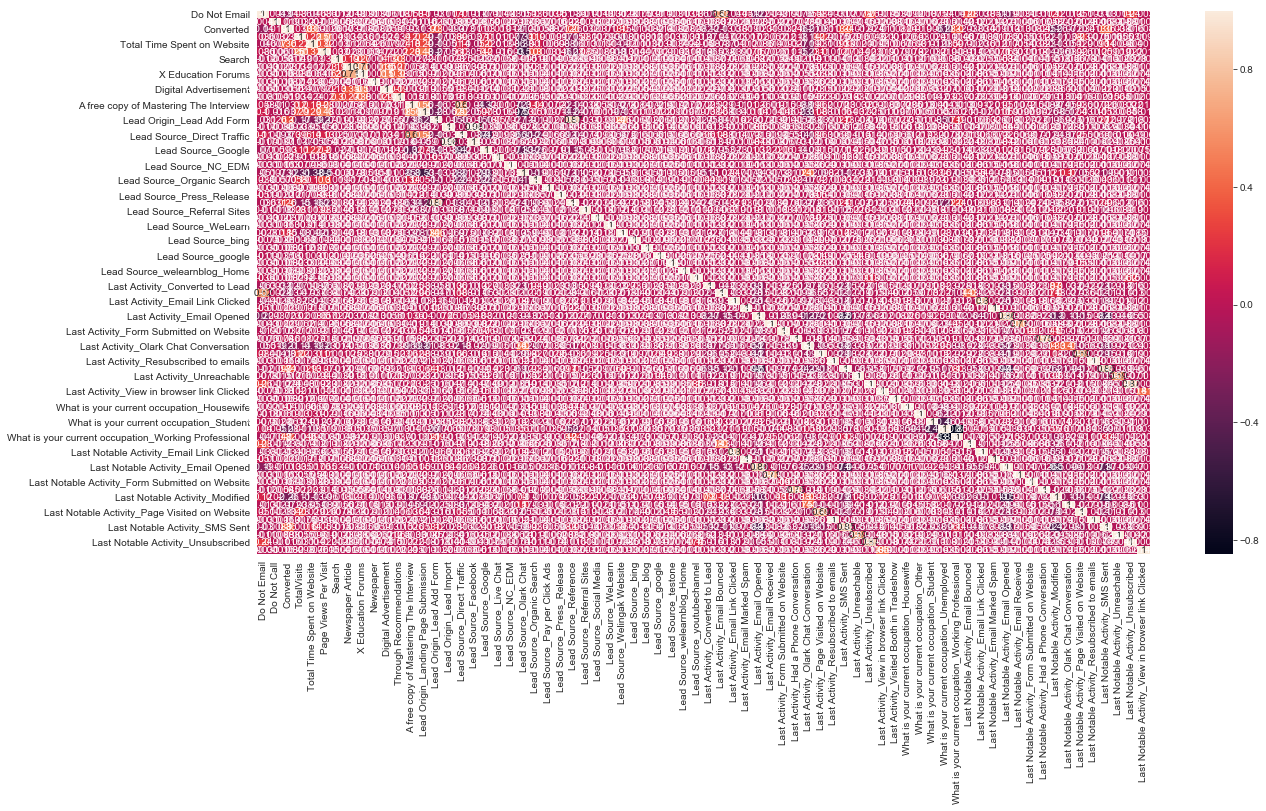

In [98]:
plt.figure(figsize = (20,10))
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [99]:
logreg = LogisticRegression()

We'll use RFE to get the col and use them in model building

In [100]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 6),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Search', False, 51),
 ('Magazine', False, 56),
 ('Newspaper Article', False, 24),
 ('X Education Forums', False, 32),
 ('Newspaper', False, 4),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 39),
 ('Receive More Updates About Our Courses', False, 55),
 ('Update me on Supply Chain Content', False, 52),
 ('Get updates on DM Content', False, 53),
 ('I agree to pay the amount through cheque', False, 54),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 33),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 12),
 ('Lead Source_Olark

In [102]:
col = X_train.columns[rfe.support_]

In [103]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Page Views Per Visit', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last A

### MODEL 1

In [104]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.0
Date:                Sun, 13 Aug 2023   Deviance:                       5234.0
Time:                        20:43:15   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4402      0.227     -1.938      0.053      -0.885       0.005
Do Not Email                                            -1.6322      0.200     -8.155      0.000      -2.024      -1.240
TotalVisits                                              6.7951      2.129      3.192      0.001       2.623      10.967
Total Time Spent on Website                              4.6335      0.166     27.853      0.000       4.307       4.960
Lead Origin_Lead Add Form                                2.2558      0.928      2.432      0.015       0.438       4.074
Lead Origin_Lead Import                                  1.6595      0.459      3.617      0.000       0.760       2.559
Lead Source_Olark Chat                                   1.3573      0.111     12.239      0.000       1.140       1.575
Lead Source_Reference                                    1.8277      0.952      1.920      0.055      -0.038       3.693
Lead Source_Welingak Website                             3.8790      1.176      3.297      0.001       1.573       6.185
Last Activity_Converted to Lead                         -1.0496      0.229     -4.582      0.000      -1.499      -0.601
Last Activity_Email Bounced                             -1.2414      0.426     -2.911      0.004      -2.077      -0.406
Last Activity_Had a Phone Conversation                   1.8834      0.786      2.395      0.017       0.342       3.425
Last Activity_Olark Chat Conversation                   -1.3313      0.191     -6.980      0.000      -1.705      -0.957
What is your current occupation_Housewife               22.3698   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_Unemployed              -0.5085      0.211     -2.408      0.016      -0.922      -0.095
What is your current occupation_Working Professional     2.2585      0.279      8.100      0.000       1.712       2.805
Last Notable Activity_Email Link Clicked                -1.9073      0.256     -7.463      0.000      -2.408      -1.406
Last Notable Activity_Email Opened                      -1.4351      0.089    -16.199      0.000      -1.609      -1.261
Last Notable Activity_Modified                          -1.7439      0.100    -17.384      0.000      -1.940      -1.547
Last Notable Activity_Olark Chat Conversation           -1.5675      0.373     -4.207      0.000      -2.298      -0.837
Last Notable Activity_Page Visited on Website           -1.8718      0.210     -8.903      0.000      -2.284      -1.460
========================================================================================================================
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.47
6,Lead Source_Reference,48.07
7,Lead Source_Welingak Website,15.46
13,What is your current occupation_Unemployed,6.12
17,Last Notable Activity_Modified,2.96
2,Total Time Spent on Website,2.24
16,Last Notable Activity_Email Opened,2.11
11,Last Activity_Olark Chat Conversation,1.99
5,Lead Source_Olark Chat,1.86
0,Do Not Email,1.85


Lead Origin_Lead Add Form has very high VIF we'll remove this and check again

In [106]:
col = col.drop('Lead Origin_Lead Add Form',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### MODEL 2

In [107]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2620.3
Date:                Sun, 13 Aug 2023   Deviance:                       5240.5
Time:                        20:43:20   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4322      0.227     -1.904      0.057      -0.877       0.013
Do Not Email                                            -1.6347      0.200     -8.175      0.000      -2.027      -1.243
TotalVisits                                              6.5836      2.108      3.123      0.002       2.452      10.715
Total Time Spent on Website                              4.6215      0.166     27.831      0.000       4.296       4.947
Lead Origin_Lead Import                                  1.6490      0.459      3.595      0.000       0.750       2.548
Lead Source_Olark Chat                                   1.3511      0.111     12.217      0.000       1.134       1.568
Lead Source_Reference                                    4.0731      0.233     17.499      0.000       3.617       4.529
Lead Source_Welingak Website                             6.1241      0.730      8.392      0.000       4.694       7.554
Last Activity_Converted to Lead                         -1.0535      0.229     -4.602      0.000      -1.502      -0.605
Last Activity_Email Bounced                             -1.2422      0.426     -2.914      0.004      -2.078      -0.407
Last Activity_Had a Phone Conversation                   1.8796      0.786      2.391      0.017       0.339       3.420
Last Activity_Olark Chat Conversation                   -1.3345      0.191     -7.001      0.000      -1.708      -0.961
What is your current occupation_Housewife               22.3676   1.57e+04      0.001      0.999   -3.07e+04    3.07e+04
What is your current occupation_Unemployed              -0.5050      0.211     -2.392      0.017      -0.919      -0.091
What is your current occupation_Working Professional     2.2577      0.279      8.100      0.000       1.711       2.804
Last Notable Activity_Email Link Clicked                -1.9103      0.255     -7.478      0.000      -2.411      -1.410
Last Notable Activity_Email Opened                      -1.4356      0.089    -16.212      0.000      -1.609      -1.262
Last Notable Activity_Modified                          -1.7445      0.100    -17.398      0.000      -1.941      -1.548
Last Notable Activity_Olark Chat Conversation           -1.5661      0.372     -4.207      0.000      -2.296      -0.836
Last Notable Activity_Page Visited on Website           -1.8514      0.209     -8.854      0.000      -2.261      -1.442
========================================================================================================================
"""

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,6.12
16,Last Notable Activity_Modified,2.96
2,Total Time Spent on Website,2.24
15,Last Notable Activity_Email Opened,2.11
10,Last Activity_Olark Chat Conversation,1.99
4,Lead Source_Olark Chat,1.86
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.77
1,TotalVisits,1.76
13,What is your current occupation_Working Profes...,1.53


What is your current occupation_house wife has high VIF so we'll drop it and check again

In [109]:
col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### MODEL 3

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.6
Date:                Sun, 13 Aug 2023   Deviance:                       5247.3
Time:                        20:43:22   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3446      0.222     -1.552      0.121      -0.780       0.091
Do Not Email                                            -1.6363      0.200     -8.181      0.000      -2.028      -1.244
TotalVisits                                              6.5446      2.104      3.111      0.002       2.422      10.667
Total Time Spent on Website                              4.6192      0.166     27.844      0.000       4.294       4.944
Lead Origin_Lead Import                                  1.6461      0.459      3.589      0.000       0.747       2.545
Lead Source_Olark Chat                                   1.3463      0.110     12.185      0.000       1.130       1.563
Lead Source_Reference                                    4.0839      0.232     17.566      0.000       3.628       4.540
Lead Source_Welingak Website                             6.1228      0.730      8.390      0.000       4.692       7.553
Last Activity_Converted to Lead                         -1.0543      0.229     -4.607      0.000      -1.503      -0.606
Last Activity_Email Bounced                             -1.2429      0.426     -2.916      0.004      -2.078      -0.408
Last Activity_Had a Phone Conversation                   1.8806      0.786      2.392      0.017       0.340       3.421
Last Activity_Olark Chat Conversation                   -1.3345      0.191     -7.000      0.000      -1.708      -0.961
What is your current occupation_Unemployed              -0.5916      0.206     -2.875      0.004      -0.995      -0.188
What is your current occupation_Working Professional     2.1704      0.275      7.902      0.000       1.632       2.709
Last Notable Activity_Email Link Clicked                -1.9029      0.254     -7.481      0.000      -2.401      -1.404
Last Notable Activity_Email Opened                      -1.4323      0.089    -16.179      0.000      -1.606      -1.259
Last Notable Activity_Modified                          -1.7455      0.100    -17.405      0.000      -1.942      -1.549
Last Notable Activity_Olark Chat Conversation           -1.5682      0.372     -4.211      0.000      -2.298      -0.838
Last Notable Activity_Page Visited on Website           -1.8517      0.209     -8.857      0.000      -2.261      -1.442
========================================================================================================================
"""

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,6.06
15,Last Notable Activity_Modified,2.95
2,Total Time Spent on Website,2.23
14,Last Notable Activity_Email Opened,2.09
10,Last Activity_Olark Chat Conversation,1.99
4,Lead Source_Olark Chat,1.86
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.77
1,TotalVisits,1.76
12,What is your current occupation_Working Profes...,1.52


What is your current occupation_Unemployed has high VIF so we'll drop it and check again

In [112]:
col = col.drop('What is your current occupation_Unemployed',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### MODEL 4

In [113]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.7
Date:                Sun, 13 Aug 2023   Deviance:                       5255.3
Time:                        20:43:25   Pearson chi2:                 6.42e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9298      0.090    -10.354      0.000      -1.106      -0.754
Do Not Email                                            -1.6300      0.200     -8.154      0.000      -2.022      -1.238
TotalVisits                                              6.5067      2.099      3.099      0.002       2.392      10.621
Total Time Spent on Website                              4.6220      0.166     27.873      0.000       4.297       4.947
Lead Origin_Lead Import                                  1.6254      0.458      3.546      0.000       0.727       2.524
Lead Source_Olark Chat                                   1.3469      0.110     12.193      0.000       1.130       1.563
Lead Source_Reference                                    4.1029      0.232     17.668      0.000       3.648       4.558
Lead Source_Welingak Website                             6.1060      0.730      8.369      0.000       4.676       7.536
Last Activity_Converted to Lead                         -1.0553      0.229     -4.606      0.000      -1.504      -0.606
Last Activity_Email Bounced                             -1.2351      0.426     -2.897      0.004      -2.071      -0.400
Last Activity_Had a Phone Conversation                   1.8708      0.786      2.381      0.017       0.331       3.411
Last Activity_Olark Chat Conversation                   -1.3273      0.190     -6.968      0.000      -1.701      -0.954
What is your current occupation_Working Professional     2.7439      0.189     14.486      0.000       2.373       3.115
Last Notable Activity_Email Link Clicked                -1.8917      0.254     -7.449      0.000      -2.389      -1.394
Last Notable Activity_Email Opened                      -1.4139      0.088    -16.044      0.000      -1.587      -1.241
Last Notable Activity_Modified                          -1.7378      0.100    -17.352      0.000      -1.934      -1.542
Last Notable Activity_Olark Chat Conversation           -1.5499      0.372     -4.172      0.000      -2.278      -0.822
Last Notable Activity_Page Visited on Website           -1.8428      0.209     -8.817      0.000      -2.252      -1.433
========================================================================================================================
"""

In [114]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,2.21
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.80
8,Last Activity_Email Bounced,1.77
2,Total Time Spent on Website,1.65
1,TotalVisits,1.61
4,Lead Source_Olark Chat,1.58
13,Last Notable Activity_Email Opened,1.47
15,Last Notable Activity_Olark Chat Conversation,1.35
7,Last Activity_Converted to Lead,1.24


Predicted values on train set

In [115]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.187318
1012    0.353273
9226    0.210695
4750    0.879473
7987    0.679387
1281    0.771543
2880    0.094693
4971    0.917731
7536    0.869098
1248    0.620704
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18731799, 0.35327329, 0.21069508, 0.87947279, 0.67938654,
       0.77154285, 0.09469337, 0.91773099, 0.86909803, 0.62070435])

Dataframe with predicted 

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

Predicted 1 if x>0.5 or 0

In [118]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.187318,0
1,0,0.353273,0
2,0,0.210695,0
3,1,0.879473,1
4,1,0.679387,1


Accuracy

In [119]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8145173988348292


VIF check again

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,2.21
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.80
8,Last Activity_Email Bounced,1.77
2,Total Time Spent on Website,1.65
1,TotalVisits,1.61
4,Lead Source_Olark Chat,1.58
13,Last Notable Activity_Email Opened,1.47
15,Last Notable Activity_Olark Chat Conversation,1.35
7,Last Activity_Converted to Lead,1.24


Confusion Matrix

In [121]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3458,  447],
       [ 731, 1715]], dtype=int64)

### Metrics beyond simply accuracy

In [122]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

Sensitivity

In [123]:
TP / float(TP+FN)

0.7011447260834015

Specificity

In [124]:
TN / float(TN+FP)

0.8855313700384123

False positive rate

In [125]:
print(FP/ float(TN+FP))

0.11446862996158771


Positive predicitive value

In [126]:
print (TP / float(TP+FP))

0.7932469935245143


Negative predicitive value

In [127]:
print (TN / float(TN+ FN))

0.8254953449510624


### Ploting ROC Curve

In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

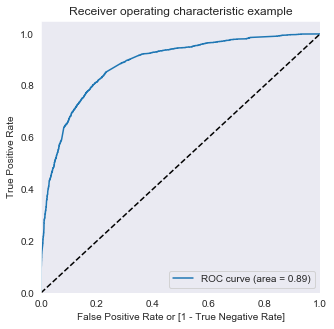

In [130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Finding the optimal cutoff point

In [131]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187318,0,1,1,0,0,0,0,0,0,0,0
1,0,0.353273,0,1,1,1,1,0,0,0,0,0,0
2,0,0.210695,0,1,1,1,0,0,0,0,0,0,0
3,1,0.879473,1,1,1,1,1,1,1,1,1,1,0
4,1,0.679387,1,1,1,1,1,1,1,1,0,0,0


In [132]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.596756  0.970564  0.362612
0.2   0.2  0.749016  0.920278  0.641741
0.3   0.3  0.800189  0.840965  0.774648
0.4   0.4  0.813573  0.771872  0.839693
0.5   0.5  0.814517  0.701145  0.885531
0.6   0.6  0.810896  0.639411  0.918310
0.7   0.7  0.780979  0.512265  0.949296
0.8   0.8  0.764132  0.436631  0.969270
0.9   0.9  0.714533  0.275961  0.989245


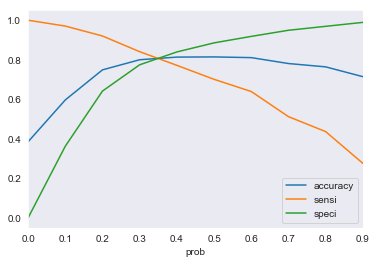

In [133]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve the optimal pointis 0.35

In [134]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.187318,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.353273,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.210695,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.879473,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.679387,1,1,1,1,1,1,1,1,0,0,0,1


In [135]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8079042670445599

In [136]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

array([[3160,  745],
       [ 475, 1971]], dtype=int64)

In [137]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

Sensitivity

In [138]:
TP / float(TP+FN)

0.8058053965658217

Specificity

In [139]:
TN / float(TN+FP)

0.8092189500640204

False positive rate

In [140]:
print(FP/ float(TN+FP))

0.19078104993597952


Positive predictive value

In [141]:
print (TP / float(TP+FP))

0.725699558173785


Negative predictive value

In [142]:
print (TN / float(TN+ FN))

0.8693259972489684


### Precision and Recall

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3458,  447],
       [ 731, 1715]], dtype=int64)

Precision

In [144]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7932469935245143

Recall

In [145]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7011447260834015

### Precision and Recall Curve

In [146]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       1
 10      1
 11      0
 12      0
 13      1
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [147]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

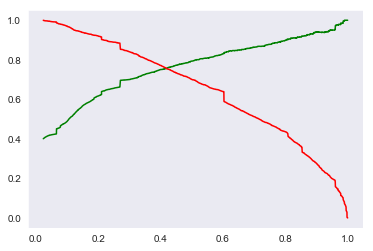

In [148]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on test data 

In [149]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [150]:
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.015936,0.070530,0.166667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.019920,0.679695,0.208333,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,0.007968,0.033243,0.083333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0.031873,0.073675,0.333333,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [151]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0.015936,0.070530,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,0.019920,0.679695,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,0.007968,0.033243,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,0.000000,0.000000,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3830,0,0.031873,0.073675,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [152]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [153]:
y_test_pred[:10]

3271    0.128530
1490    0.975190
7936    0.105439
4216    0.807710
3830    0.142364
1800    0.671183
6507    0.357969
4821    0.294057
4223    0.959807
4714    0.210695
dtype: float64

In [154]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.128530
1490,0.975190
7936,0.105439
4216,0.807710
3830,0.142364


In [155]:
y_test_df = pd.DataFrame(y_test)

In [156]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,Converted,0
0,0,0.128530
1,1,0.975190
2,0,0.105439
3,1,0.807710
4,0,0.142364


In [159]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.128530
1,1,0.975190
2,0,0.105439
3,1,0.807710
4,0,0.142364


In [160]:
y_pred_final['Final_Predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Final_Predicted
0,0,0.128530,0
1,1,0.975190,1
2,0,0.105439,0
3,1,0.807710,1
4,0,0.142364,0


In [161]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.8141755416819684

In [162]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1471,  263],
       [ 243,  746]], dtype=int64)

In [163]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

Sensitivity

In [164]:
TP / float(TP+FN)

0.7542972699696663

Specificity

In [165]:
TN / float(TN+FP)

0.8483275663206459

### Conclusion <br>
#### Top Features 
1. TotalVisits<br>
2. Lead Source ( Welingak Website)<br>
3. Total Time Spent on Website<br>
